In [12]:
import numpy as np
import pandas as pd

In [13]:
#df = pd.DataFrame([['a','b','c'], [1,2,3]])
#df = pd.DataFrame({'a':[1,2,3],'b':[5,6,7]})
#df = pd.DataFrame(np.random.randn(3,2))
df = pd.DataFrame(np.random.randint(1,10,6) .reshape (2,3), columns=['Cruzeiro', 'Atletico','America'],
                 index=['Gols','Vitorias'])
df

,Cruzeiro,Atletico,America
Gols,7,3,1
Vitorias,4,4,3


**Selecão de dados**

In [14]:
type(df['Atletico'])

pandas.core.series.Series

In [23]:
df['Cruzeiro']['Vitorias']

2

In [25]:
df.Cruzeiro

Gols        4
Vitorias    2
Name: Cruzeiro, dtype: int32

In [6]:
df

NameError: name 'df' is not defined

In [27]:
df.loc['Vitorias']

Cruzeiro    2
Atletico    5
America     6
Name: Vitorias, dtype: int32

In [28]:
df.loc[['Vitorias'],['Atletico','America']]

,Atletico,America
Vitorias,5,6


In [29]:
df.iloc[1]

Cruzeiro    2
Atletico    5
America     6
Name: Vitorias, dtype: int32

In [30]:
df.iloc[0,1:3]

Atletico    3
America     6
Name: Gols, dtype: int32

**Adição e Remoção de Linhas e Colunas no DataFrame**

In [14]:
df

,Cruzeiro,Atletico,America
Gols,7,3,1
Vitorias,4,4,3


In [15]:
df['Flamego']=[3,17]
df

,Cruzeiro,Atletico,America,Flamego
Gols,7,3,1,3
Vitorias,4,4,3,17


In [16]:
df.loc['Empates']=[0,0,0,0]


,Cruzeiro,Atletico,America,Flamego
Gols,7,3,1,3
Vitorias,4,4,3,17
Empates,0,0,0,0


In [17]:
df.drop('America', axis=1)

,Cruzeiro,Atletico,Flamego
Gols,7,3,3
Vitorias,4,4,17
Empates,0,0,0


In [18]:
df

,Cruzeiro,Atletico,America,Flamego
Gols,7,3,1,3
Vitorias,4,4,3,17
Empates,0,0,0,0


In [20]:
df.drop('America', axis=1, inplace=True)

KeyError: "['America'] not found in axis"

In [21]:
df

,Cruzeiro,Atletico,Flamego
Gols,7,3,3
Vitorias,4,4,17
Empates,0,0,0


In [22]:
del df['Cruzeiro']

In [23]:
df

,Atletico,Flamego
Gols,3,3
Vitorias,4,17
Empates,0,0


In [25]:
df.drop('Empates',axis=0)

,Atletico,Flamego
Gols,3,3
Vitorias,4,17


In [26]:
df

,Atletico,Flamego
Gols,3,3
Vitorias,4,17
Empates,0,0


In [28]:
df.drop('Empates',axis=0, inplace=True)

In [29]:
df

,Atletico,Flamego
Gols,3,3
Vitorias,4,17


In [32]:
df2 = pd.DataFrame({'a':[1,2,np.nan],'b':[5,6,7],'c':[2,4,np.nan]})
df2

,a,b,c
0,1.0,5,2.0
1,2.0,6,4.0
2,NaN,7,NaN


In [33]:
df2.dropna()

,a,b,c
0,1.0,5,2.0
1,2.0,6,4.0


In [34]:
df2.drop_duplicates(subset=['a'])

,a,b,c
0,1.0,5,2.0
1,2.0,6,4.0
2,NaN,7,NaN


In [35]:
df2.fillna('Helio')

,a,b,c
0,1.0,5,2.0
1,2.0,6,4.0
2,Helio,7,Helio


In [36]:
df2.fillna(value=df2['b'].mean())

,a,b,c
0,1.0,5,2.0
1,2.0,6,4.0
2,6.0,7,6.0


In [37]:
df = pd.DataFrame({"modelo":["Uno","Monza","Camaro","Gol","Palio"],
                  "marca":["Fiat","Chevrolet","Chevrolet","VW","Fiat"],
                  "valor":[10000,20000,20000,30000,15000],
                   "unidades":[10,30,100,25,15]})
df

,modelo,marca,valor,unidades
0,Uno,Fiat,10000,10
1,Monza,Chevrolet,20000,30
2,Camaro,Chevrolet,20000,100
3,Gol,VW,30000,25
4,Palio,Fiat,15000,15


**Métodos Descritivos**

In [38]:
df.describe()

,valor,unidades
count,5.000000,5.000000
mean,19000.000000,36.000000
std,7416.198487,36.640142
min,10000.000000,10.000000
25%,15000.000000,15.000000
50%,20000.000000,25.000000
75%,20000.000000,30.000000
max,30000.000000,100.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   modelo    5 non-null      object
 1   marca     5 non-null      object
 2   valor     5 non-null      int64 
 3   unidades  5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 288.0+ bytes


In [42]:
df.count()

modelo      5
marca       5
valor       5
unidades    5
dtype: int64

In [43]:
df

,modelo,marca,valor,unidades
0,Uno,Fiat,10000,10
1,Monza,Chevrolet,20000,30
2,Camaro,Chevrolet,20000,100
3,Gol,VW,30000,25
4,Palio,Fiat,15000,15


In [45]:
grupo = df.groupby("marca")
grupo['marca'].count()

marca
Chevrolet    2
Fiat         2
VW           1
Name: marca, dtype: int64

In [46]:
grupo['modelo'].value_counts()

marca      modelo
Chevrolet  Camaro    1
           Monza     1
Fiat       Palio     1
           Uno       1
VW         Gol       1
Name: modelo, dtype: int64

In [47]:
grupo['valor'].mean()

marca
Chevrolet    20000.0
Fiat         12500.0
VW           30000.0
Name: valor, dtype: float64

In [48]:
grupo['unidades'].sum()

marca
Chevrolet    130
Fiat          25
VW            25
Name: unidades, dtype: int64

In [49]:
df['marca'].unique()

array(['Fiat', 'Chevrolet', 'VW'], dtype=object)

In [50]:
df['marca'].nunique()

3

In [51]:
df['marca'].value_counts()

Fiat         2
Chevrolet    2
VW           1
Name: marca, dtype: int64

In [52]:
df1 = pd.DataFrame({'A':[1,2,3],'B':[4,5,6]},index=[19,20,21])
df2 = pd.DataFrame({'C':['a','b','c'],'D':['d','e','f']},index=[20,21,22])

**União de DataFrames**

In [53]:
df1

,A,B
19,1,4
20,2,5
21,3,6


In [54]:
df2

,C,D
20,a,d
21,b,e
22,c,f


In [56]:
pd.concat([df1,df2], axis=1)

,A,B,C,D
19,1.0,4.0,NaN,NaN
20,2.0,5.0,a,d
21,3.0,6.0,b,e
22,NaN,NaN,c,f


In [60]:
df1.join(df2,how='outer').fillna(df1['A'].mean())

,A,B,C,D
19,1.0,4.0,2.0,2.0
20,2.0,5.0,a,d
21,3.0,6.0,b,e
22,2.0,2.0,c,f


**Filtros**

In [63]:
df1['c']=[8,10,12]

In [64]:
df1


,A,B,c
19,1,4,8
20,2,5,10
21,3,6,12


In [65]:
df1.loc[22]=[13,16,19]

In [66]:
df1

,A,B,c
19,1,4,8
20,2,5,10
21,3,6,12
22,13,16,19


In [67]:
df1[df1['A']>2]

,A,B,c
21,3,6,12
22,13,16,19


In [73]:
df1[(df1['A']>2) & (df1['c']>15)] 

,A,B,c
22,13,16,19


In [71]:
df1[df1['B'] == 6]

,A,B,c
21,3,6,12


**Função apply**

In [74]:
df1

,A,B,c
19,1,4,8
20,2,5,10
21,3,6,12
22,13,16,19


In [75]:
df1.apply(lambda x:x*3)

,A,B,c
19,3,12,24
20,6,15,30
21,9,18,36
22,39,48,57


In [76]:
df1

,A,B,c
19,1,4,8
20,2,5,10
21,3,6,12
22,13,16,19


In [84]:
def maioresCincoA(x):
    if x > 5:
        return True
    else:
        return False
#df1['Maiores']=df1['A'].apply(maioresCincoA)
df1['A']=df1['A'].apply(maioresCincoA)

In [85]:
df1

,A,B,c
19,False,4,8
20,False,5,10
21,False,6,12
22,True,16,19


**Importar DataFrame**

In [91]:
df = pd.read_csv("netflix_titles.csv", sep=',')
df.head()

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,runtime,cast,director,composer,writer,runtimes
0,0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",7.7,474.0,['United States'],['English'],['50'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",NaN
1,1,Character,2021.0,movie,"['Crime', 'Horror', 'Thriller']",8.3,46.0,['Japan'],['Japanese'],['125'],"['Masaki Suda', 'Fukase', 'Mitsuki Takahata', ...",['Akira Nagai'],['Youki Kojima'],"['Takashi Nagasaki', 'Takashi Nagasaki', 'Anna...",NaN
2,2,Get Up and Dance!,1994.0,video movie,['Family'],8.1,18.0,['United States'],['English'],['54'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,NaN
3,3,The Rise and Fall of El Chapo,2016.0,tv movie,['Documentary'],6.9,42.0,['United States'],NaN,['85'],NaN,NaN,NaN,NaN,NaN
4,4,Sick - IMDb,NaN,NaN,['Thriller'],NaN,NaN,['United States'],NaN,NaN,"['Marc Menchaca', 'Gideon Adlon', 'Dylan Spray...",['John Hyams'],NaN,"['Katelyn Crabb', 'Kevin Williamson']",NaN


In [92]:
del df['Unnamed: 0']

In [93]:
df.head()

,title,year,kind,genre,rating,vote,country,language,runtime,cast,director,composer,writer,runtimes
0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",7.7,474.0,['United States'],['English'],['50'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",NaN
1,Character,2021.0,movie,"['Crime', 'Horror', 'Thriller']",8.3,46.0,['Japan'],['Japanese'],['125'],"['Masaki Suda', 'Fukase', 'Mitsuki Takahata', ...",['Akira Nagai'],['Youki Kojima'],"['Takashi Nagasaki', 'Takashi Nagasaki', 'Anna...",NaN
2,Get Up and Dance!,1994.0,video movie,['Family'],8.1,18.0,['United States'],['English'],['54'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,NaN
3,The Rise and Fall of El Chapo,2016.0,tv movie,['Documentary'],6.9,42.0,['United States'],NaN,['85'],NaN,NaN,NaN,NaN,NaN
4,Sick - IMDb,NaN,NaN,['Thriller'],NaN,NaN,['United States'],NaN,NaN,"['Marc Menchaca', 'Gideon Adlon', 'Dylan Spray...",['John Hyams'],NaN,"['Katelyn Crabb', 'Kevin Williamson']",NaN


In [94]:
df.describe()


,year,rating,vote
count,9756.000000,8949.000000,8.949000e+03
mean,1994.739750,6.680635,2.121821e+04
std,16.245087,1.285113,9.804873e+04
min,1905.000000,1.000000,5.000000e+00
25%,1989.750000,6.000000,2.830000e+02
50%,1999.000000,6.900000,1.535000e+03
75%,2003.000000,7.600000,7.570000e+03
max,2023.000000,9.600000,2.462087e+06


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9826 entries, 0 to 9825
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     9825 non-null   object 
 1   year      9756 non-null   float64
 2   kind      9788 non-null   object 
 3   genre     9733 non-null   object 
 4   rating    8949 non-null   float64
 5   vote      8949 non-null   float64
 6   country   9161 non-null   object 
 7   language  9033 non-null   object 
 8   runtime   5916 non-null   object 
 9   cast      9482 non-null   object 
 10  director  7966 non-null   object 
 11  composer  6204 non-null   object 
 12  writer    8170 non-null   object 
 13  runtimes  2854 non-null   object 
dtypes: float64(3), object(11)
memory usage: 1.0+ MB


In [100]:
print (df.head(20).to_html()) 

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>title</th>
      <th>year</th>
      <th>kind</th>
      <th>genre</th>
      <th>rating</th>
      <th>vote</th>
      <th>country</th>
      <th>language</th>
      <th>runtime</th>
      <th>cast</th>
      <th>director</th>
      <th>composer</th>
      <th>writer</th>
      <th>runtimes</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Dinosaur Planet</td>
      <td>2003.0</td>
      <td>tv mini series</td>
      <td>['Documentary', 'Animation', 'Family']</td>
      <td>7.7</td>
      <td>474.0</td>
      <td>['United States']</td>
      <td>['English']</td>
      <td>['50']</td>
      <td>['Christian Slater', 'Scott Sampson']</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>['Mike Carrol', 'Mike Carroll', 'Georgann Kane']</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Character</td>
      <td>2021.0</td>
      <td>movie</td>

In [1]:
df[df['country']=='Brazil'].head(20) .to_html('netflix.html')

NameError: name 'df' is not defined

In [8]:
!pip install sqlalchemy

In [9]:
!pip install pymysql

In [10]:
!pip install lxml


  Using cached lxml-4.6.3-cp39-cp39-win_amd64.whl (3.5 MB)


In [11]:
from sqlalchemy import create_engine
import pymysql

In [ ]:
db_connection = create_engine("mysql+pymysql://root:@localhost:3306/wef")
df = pd.read_sql('select * from posts',con=db_connection)
df[df['Id']==42].head()

In [12]:
!pip install openpyxl

In [13]:
df.to_excel('db.xlsx')

NameError: name 'df' is not defined

**Plotagem de dados**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [11]:
df = pd.read_csv("netflix_titles.csv",sep=',')
df.head()

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,runtime,cast,director,composer,writer,runtimes
0,0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",7.7,474.0,['United States'],['English'],['50'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",NaN
1,1,Character,2021.0,movie,"['Crime', 'Horror', 'Thriller']",8.3,46.0,['Japan'],['Japanese'],['125'],"['Masaki Suda', 'Fukase', 'Mitsuki Takahata', ...",['Akira Nagai'],['Youki Kojima'],"['Takashi Nagasaki', 'Takashi Nagasaki', 'Anna...",NaN
2,2,Get Up and Dance!,1994.0,video movie,['Family'],8.1,18.0,['United States'],['English'],['54'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,NaN
3,3,The Rise and Fall of El Chapo,2016.0,tv movie,['Documentary'],6.9,42.0,['United States'],NaN,['85'],NaN,NaN,NaN,NaN,NaN
4,4,Sick - IMDb,NaN,NaN,['Thriller'],NaN,NaN,['United States'],NaN,NaN,"['Marc Menchaca', 'Gideon Adlon', 'Dylan Spray...",['John Hyams'],NaN,"['Katelyn Crabb', 'Kevin Williamson']",NaN


**Definir eixo x e y**

In [23]:
x = df['year'] .value_counts() .index
y = df['year'] .value_counts() .values

**Gráfico de barr**

<BarContainer object of 109 artists>

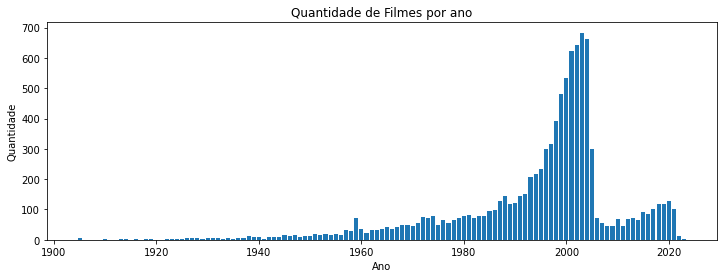

In [25]:
fig, axs = plt.subplots(figsize=(12,4))
axs.set_xlabel('Ano')
axs.set_ylabel('Quantidade')
axs.set_title('Quantidade de Filmes por ano')
axs.bar(x, y)

In [30]:
x = df['kind'] .value_counts() .index
y = df['kind'] .value_counts() .values

**Gráfico de Pizza**

(-1.1098151200082533,
 1.103791659322201,
 -1.1041253618372098,
 1.1001964460477123)

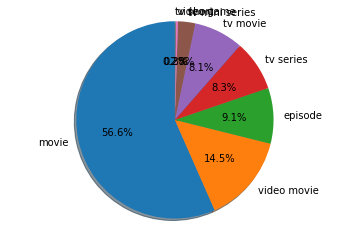

In [31]:
fig1, ax1 = plt.subplots()
ax1.pie(y, labels=x, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 

**Seabron e Pandas**

In [32]:
!pip install seaborn

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**DataFrame de voos**

In [34]:
df = pd.read_csv("flights.csv",sep=",")
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        144 non-null    int64 
 1   month       144 non-null    object
 2   passengers  144 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.5+ KB


In [36]:
df.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


**Inicializando com os plots**

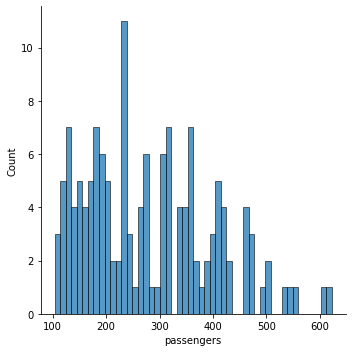

In [40]:
sns.displot(df['passengers'],bins=50)

<AxesSubplot:xlabel='year', ylabel='passengers'>

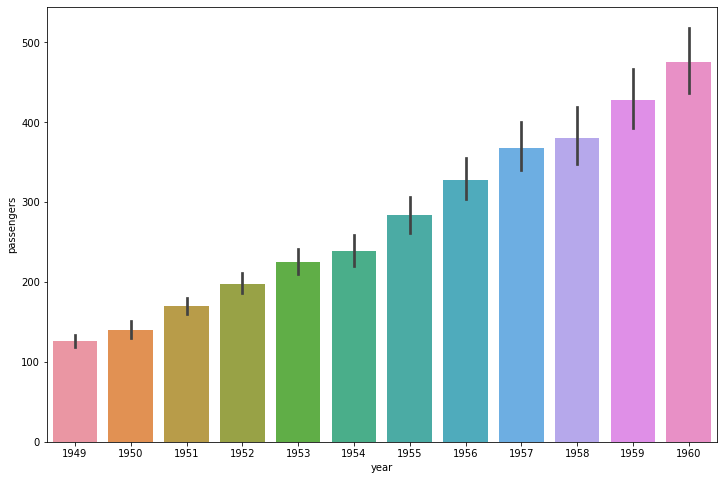

In [43]:
plt.figure(figsize=(12,8))
sns.barplot(x='year', y='passengers',data=df)

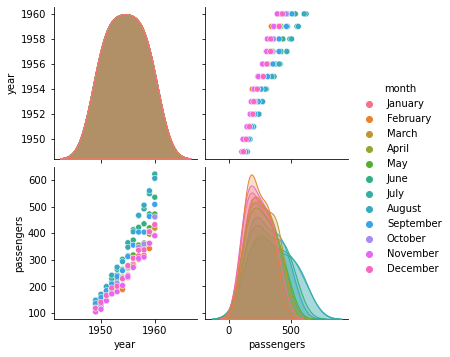

In [46]:

sns.pairplot(df,hue='month')

<AxesSubplot:>

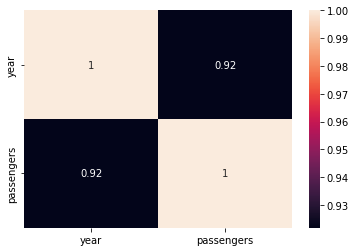

In [48]:
sns.heatmap(df.corr(), annot=True)

**DataFrame de acidentes Veiculares**

In [50]:
df = pd.read_csv("car_carshes.csv" ,sep=",")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'car_carshes.csv'